In [1]:
from taming.data.phylogeny import Phylogeny

In [2]:
phylogeny = Phylogeny("/home/elhamod/data/Fish")

{'Alosa chrysochloris': 482298, 'Carassius auratus': 1005907, 'Cyprinus carpio': 429083, 'Esox americanus': 496115, 'Gambusia affinis': 617445, 'Lepisosteus osseus': 519445, 'Lepisosteus platostomus': 731608, 'Lepomis auritus': 1002718, 'Lepomis cyanellus': 476361, 'Lepomis gibbosus': 670266, 'Lepomis gulosus': 476359, 'Lepomis humilis': 892772, 'Lepomis macrochirus': 836783, 'Lepomis megalotis': 271249, 'Lepomis microlophus': 271244, 'Morone chrysops': 246133, 'Morone mississippiensis': 769290, 'Notropis atherinoides': 636312, 'Notropis blennius': 419165, 'Notropis boops': 443777, 'Notropis buccatus': 269524, 'Notropis buchanani': 555686, 'Notropis dorsalis': 419160, 'Notropis hudsonius': 135051, 'Notropis leuciodus': 338652, 'Notropis nubilus': 550199, 'Notropis percobromus': 403731, 'Notropis stramineus': 351741, 'Notropis telescopus': 550190, 'Notropis texanus': 550208, 'Notropis volucellus': 351735, 'Notropis wickliffi': 563834, 'Noturus exilis': 678206, 'Noturus flavus': 101864, 

In [3]:
tree = phylogeny.tree

In [4]:
distances_from_root = []
hops_fro_root = []
r = tree.get_tree_root()
for n in tree.traverse():
    distances_from_root.append(tree.get_distance(n, r))
    hops_fro_root.append(tree.get_distance(n, r, topology_only=True))
    
distances_from_root = [x/max(distances_from_root) for x in distances_from_root] # 1- ?

<BarContainer object of 30 artists>

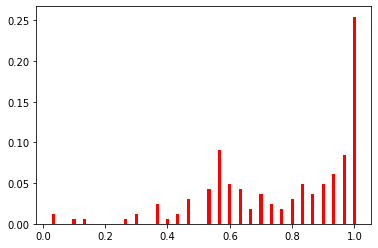

In [5]:
import matplotlib.pyplot as plt
import scipy
import numpy as np
%matplotlib inline

count1, bins_count1 = np.histogram(distances_from_root, bins=30)
pdf = count1 / sum(count1)
plt.bar(bins_count1[1:], pdf, color="red", label="PDF", width = 0.01)

In [6]:
# yticks = [0.25, 0.5, 0.75]
yticks = [1/15, 3/15, 7/15] # each band should double number of nodes. [x, 2x, 4x, 8x]

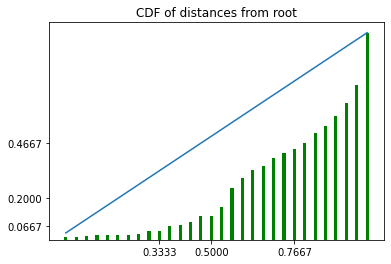

In [7]:
cdf = np.cumsum(pdf)

plt.bar(bins_count1[1:], cdf, color="green", label="CDF", width = 0.01)
plt.plot(bins_count1[1:], bins_count1[1:])

plt.yticks(yticks)

xticks = []
j = 0
for indx, i in enumerate(bins_count1[1:]):
    if cdf[indx] > yticks[j]:
        xtick = bins_count1[indx-1]
        xticks.append(xtick)
        j = j+1
        if j == 3: break
plt.xticks(xticks)        

plt.title("CDF of distances from root")

plt.show()



In [10]:
print('The phylo quantizations should be at', xticks)

The phylo quantizations should be at [0.3333333333333333, 0.5, 0.7666666666666666]


In [8]:
#### Scratches:

# plt.hist(distances_from_root, density=True, bins=30, cumulative=True) 
# plt.ylabel('CDF')
# plt.xlabel('Distance');

# from ete3 import Tree
# def search_by_size(node, size):
#     "Finds nodes with a given number of leaves"
#     matches = []
#     for n in node.traverse():
#        if len(n) == size:
#           matches.append(n)
#     return matches

# t = Tree()
# t.populate(40)
# # returns nodes containing 6 leaves
# search_by_size(t, size=6)

# hops_fro_root = [x/max(hops_fro_root) for x in hops_fro_root]